🤖 ChatSearchBot 3.0 — A* + Greedy Pathfinder 🌍
Type: <start> <goal> [astar|greedy], or 'quit' to exit.



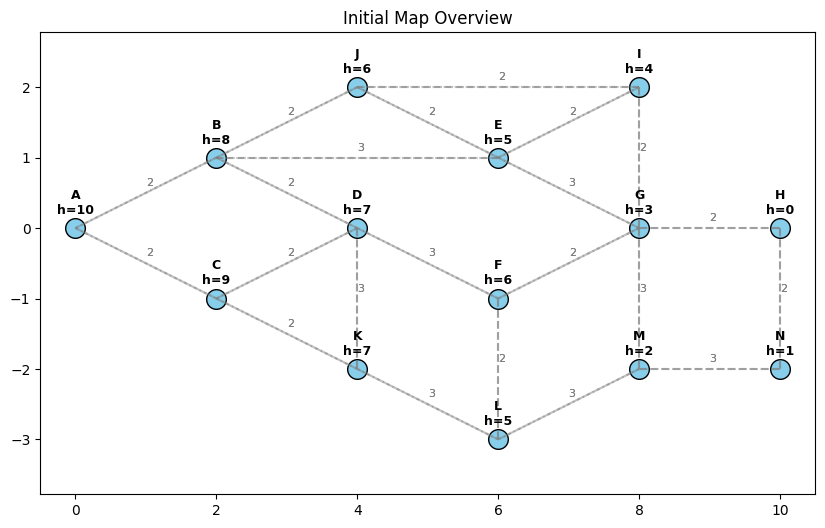

You>  A M greedy


🔍 Searching best path from A → M using GREEDY...
✅ Path found: A → B → E → G → H → N → M


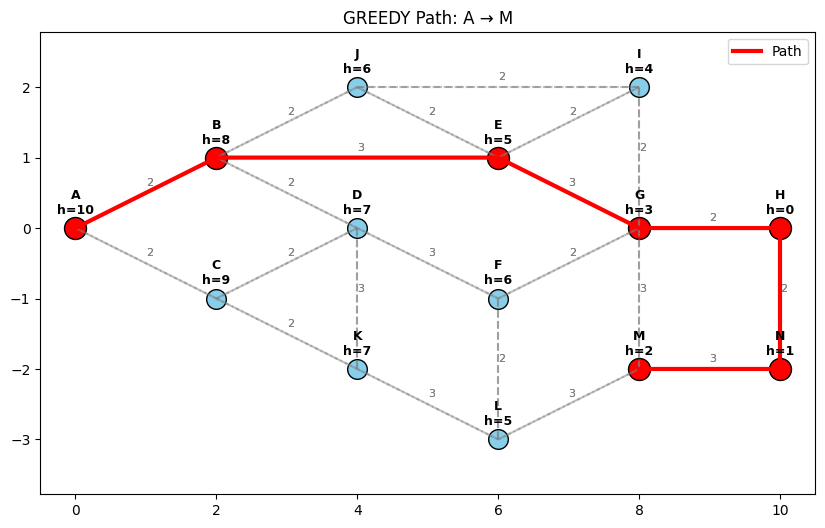

You>  A M astar


🔍 Searching best path from A → M using ASTAR...
✅ Path found: A → C → K → L → M


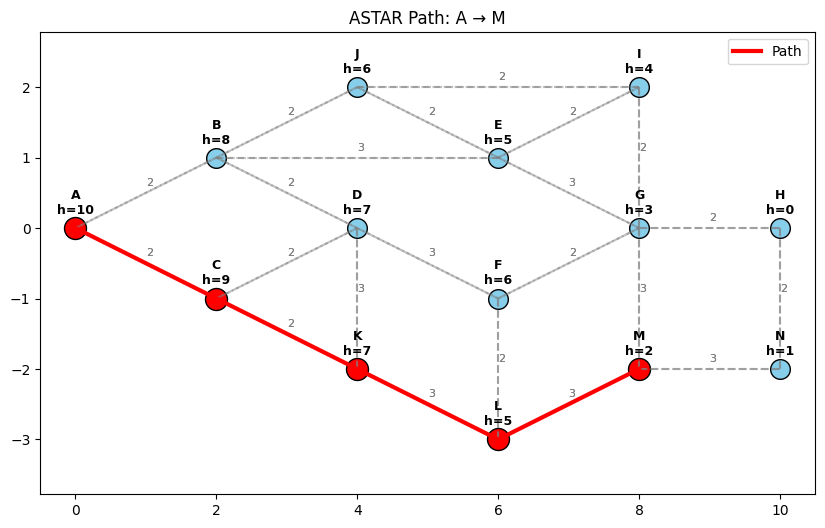

You>  exit


👋 Exiting. Stay curious!


In [14]:
import heapq
import matplotlib.pyplot as plt

# =====================================================
# 🗺️ GRAPH DATA (Rounded Path Costs + Explicit Heuristics)
# =====================================================

GRAPH = {
    "A": {"B": 2, "C": 2},
    "B": {"A": 2, "D": 2, "J": 2, "E": 3},
    "C": {"A": 2, "D": 2, "K": 2},
    "D": {"B": 2, "C": 2, "F": 3, "K": 3},
    "E": {"B": 3, "J": 2, "I": 2, "G": 3},
    "F": {"D": 3, "G": 2, "L": 2},
    "G": {"E": 3, "F": 2, "I": 2, "H": 2, "M": 3},
    "H": {"G": 2, "N": 2},
    "I": {"E": 2, "G": 2, "J": 2},
    "J": {"B": 2, "E": 2, "I": 2},
    "K": {"C": 2, "D": 3, "L": 3},
    "L": {"K": 3, "F": 2, "M": 3},
    "M": {"L": 3, "G": 3, "N": 3},
    "N": {"H": 2, "M": 3}
}

HEURISTIC = {
    "A": 10, "B": 8, "C": 9, "D": 7, "E": 5, "F": 6,
    "G": 3, "H": 0, "I": 4, "J": 6, "K": 7, "L": 5,
    "M": 2, "N": 1
}

COORDS = {
    "A": (0, 0),
    "B": (2, 1),
    "C": (2, -1),
    "D": (4, 0),
    "E": (6, 1),
    "F": (6, -1),
    "G": (8, 0),
    "H": (10, 0),
    "I": (8, 2),
    "J": (4, 2),
    "K": (4, -2),
    "L": (6, -3),
    "M": (8, -2),
    "N": (10, -2)
}

# =====================================================
# 🔍 HEURISTIC FUNCTION
# =====================================================
def heuristic(a, goal="H"):
    return HEURISTIC[a]

# =====================================================
# ⭐ A* SEARCH
# =====================================================
def a_star(start, goal, debug=False):
    open_heap = [(heuristic(start, goal), 0, start)]
    came_from = {start: None}
    g_score = {start: 0}
    closed = set()

    while open_heap:
        f, g, current = heapq.heappop(open_heap)
        if current in closed:
            continue

        if current == goal:
            return reconstruct_path(came_from, current)

        closed.add(current)
        for neighbor, cost in GRAPH[current].items():
            tentative_g = g_score[current] + cost
            f_score = tentative_g + heuristic(neighbor, goal)
            if tentative_g < g_score.get(neighbor, float('inf')):
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                heapq.heappush(open_heap, (f_score, tentative_g, neighbor))
    return None

# =====================================================
# 💨 GREEDY BEST-FIRST SEARCH
# =====================================================
def greedy_best_first(start, goal):
    open_heap = [(heuristic(start, goal), 0, start)]
    came_from = {start: None}
    visited = set()

    while open_heap:
        h, g, current = heapq.heappop(open_heap)
        if current in visited:
            continue
        if current == goal:
            return reconstruct_path(came_from, current)
        visited.add(current)
        for neighbor, cost in GRAPH[current].items():
            if neighbor not in visited:
                came_from[neighbor] = current
                new_g = g + cost
                heapq.heappush(open_heap, (heuristic(neighbor, goal), new_g, neighbor))
    return None

# =====================================================
# 🧩 PATH RECONSTRUCTION
# =====================================================
def reconstruct_path(came_from, current):
    path = [current]
    while came_from[current] is not None:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path

# =====================================================
# 🎨 VISUALIZATION
# =====================================================
def plot_graph(path=None, title="Search Graph"):
    plt.figure(figsize=(10, 6))

    # Draw edges
    for node, neighbors in GRAPH.items():
        x1, y1 = COORDS[node]
        for neighbor, cost in neighbors.items():
            x2, y2 = COORDS[neighbor]
            plt.plot([x1, x2], [y1, y2], 'gray', linestyle='--', alpha=0.5)
            midx, midy = (x1 + x2)/2, (y1 + y2)/2
            plt.text(midx, midy + 0.1, str(cost), fontsize=8, color='gray')

    # Draw nodes
    for node, (x, y) in COORDS.items():
        plt.scatter(x, y, c="skyblue", s=200, edgecolors="black")
        plt.text(x, y + 0.2, f"{node}\nh={HEURISTIC[node]}", ha='center', fontsize=9, fontweight='bold')

    # Highlight path
    if path:
        xs = [COORDS[n][0] for n in path]
        ys = [COORDS[n][1] for n in path]
        plt.plot(xs, ys, 'r-', linewidth=3, label="Path")
        for n in path:
            plt.scatter(*COORDS[n], c="red", s=250, edgecolors="black")
        plt.legend()

    plt.title(title)
    plt.axis('equal')
    plt.show()

# =====================================================
# 💬 CHATBOT INTERFACE
# =====================================================
def main():
    print("🤖 ChatSearchBot 3.0 — A* + Greedy Pathfinder 🌍")
    print("Type: <start> <goal> [astar|greedy], or 'quit' to exit.\n")

    plot_graph(title="Initial Map Overview")

    while True:
        user_input = input("You> ").strip().split()
        if not user_input:
            continue
        if user_input[0].lower() in ("quit", "exit"):
            print("👋 Exiting. Stay curious!")
            break
        if len(user_input) < 2:
            print("Usage: <start> <goal> [astar|greedy]")
            continue

        start, goal = user_input[0].upper(), user_input[1].upper()
        algo = user_input[2].lower() if len(user_input) > 2 else "astar"

        if start not in GRAPH or goal not in GRAPH:
            print("❌ Invalid node(s). Try again.")
            continue

        print(f"🔍 Searching best path from {start} → {goal} using {algo.upper()}...")

        if algo == "astar":
            path = a_star(start, goal, debug=True)
        elif algo == "greedy":
            path = greedy_best_first(start, goal)
        else:
            print("Unknown algorithm. Use 'astar' or 'greedy'.")
            continue

        if not path:
            print("⚠️ No path found.")
        else:
            print(f"✅ Path found: {' → '.join(path)}")
            plot_graph(path, title=f"{algo.upper()} Path: {start} → {goal}")

if __name__ == "__main__":
    main()
